# The ecosystem of communication channels

## Communication protocol layers

Open Systems Interconnection (OIS) model:

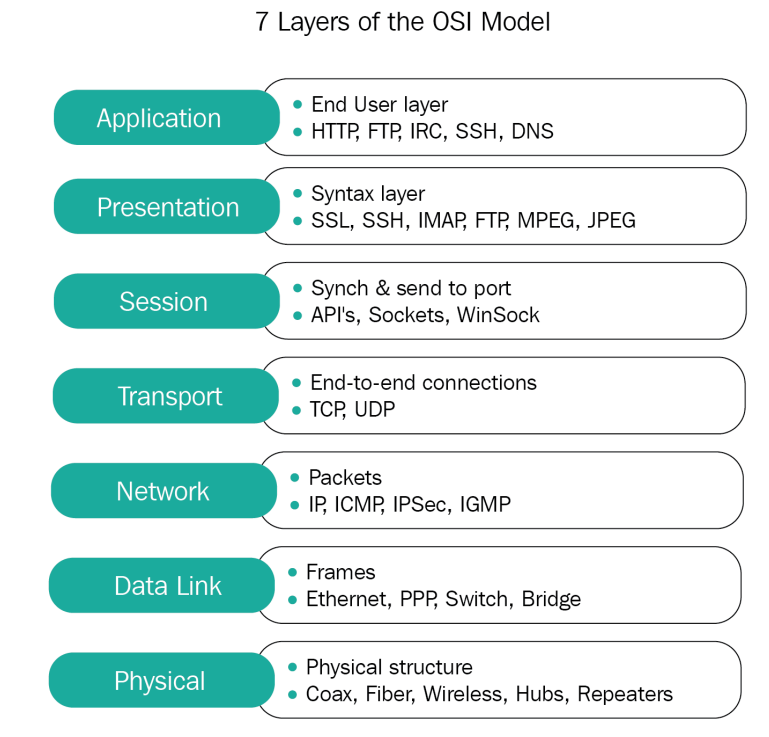

1. The three bottom layers contain low-level operations that interact with the underlying 
process of the communication channel. 
* The operations in the physical and data link layers include coding schemes, access schemes, low-level error detection and correction, bit synchronization, and so on. These operations are used to implement and specify the logic of processing and preparing data before transferring it. 
* The network layer, on the other 
hand, handles forwarding packets of data from one system (for example, the server) to 
another (for example, the client) in a computer network, by determining the address of 
the recipient and which path of data transfer to take.


2. The top layers deal with high-level data communication and manipulation. We will be focusing on the transport layer, as it is directly utilized by the `asyncio` module in the implementation of communication channels.


* The session layer handles the authentication, authorization, and session restoration processes after receiving data from the transport layer.
*   The presentation layer then translates the same data and reorganizes it into an interpretable representation. 
* The application layer displays that data in a user-friendly format.

## Asynchronous programming for communication channels
In HyperText Transfer Protocol (HTTP) communication, the server can asynchronously handle multiple clients at the same time: while it is waiting for a specific client to make an HTTP request, it can switch to another client and process that client's request. 

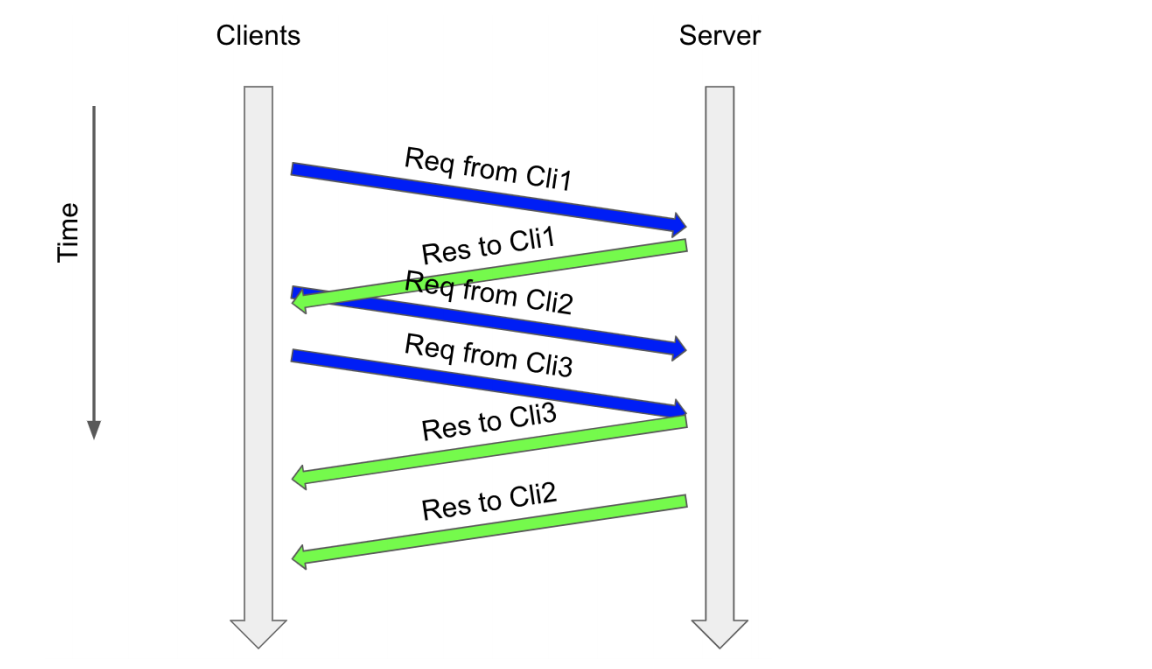

## Transports and protocols in asyncio

A `transport` object in an established communication 
channel in asyncio is always associated with an instance of the `asyncio.Protocol` class. For each connection made with another system, a new protocol object from this class will be created. Therefore,  we generally need to focus on the implementation of an `asyncio.Protocol` subclass and its methods while building a connection channel. 

*   `Protocol.connection_made(transport)`:  automatically called whenever a connection from another system is made. The `transport`
argument holds the `transport` object that is associated with the connection. 
* `Protocol.data_received(data)`: automatically called whenever the system that we are connected to sends its data. 

Other important methods of transport class:

*   `BaseTransport.get_extra_info()`: returns additional channel-specific information for the calling `transport` object.
*   `BaseTransport.close()`: close the calling `transport` object, after which the connections between different systems will be stopped. 




## Big picture of asyncio's server client

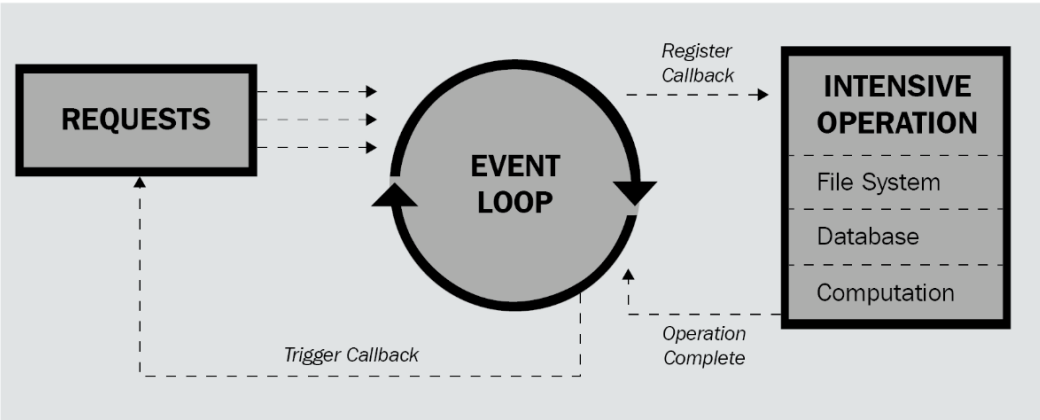

### Starting a server

In [18]:
import asyncio

class EchoServerClientProtocol(asyncio.Protocol):
    def connection_made(self, transport):
        peername = transport.get_extra_info("peername")
        print("Connection from {}".format(peername))
        self.transport = transport

    def data_received(self, data):
        message = data.decode()
        print("Data received: {!r}".format(message))


loop = asyncio.get_event_loop()
coro = loop.create_server(EchoServerClientProtocol, "127.0.0.1", 8888)
server = loop.run_until_complete(coro)

# Serve requests until Ctrl+C is pressed
print("Serving on {}".format(server.sockets[0].getsockname()))
try:
    loop.run_forever()
except KeyboardInterrupt:
    pass

# Close the server
server.close()
loop.run_until_complete(server.wait_closed())
loop.close()

Serving on ('127.0.0.1', 8888)


RuntimeError: ignored

### Sending message back to clients

In [ ]:
import asyncio


class EchoServerClientProtocol(asyncio.Protocol):
    def connection_made(self, transport):
        peername = transport.get_extra_info("peername")
        print("Connection from {}".format(peername))
        self.transport = transport

    def data_received(self, data):
        message = data.decode()
        print("Data received: {!r}".format(message))

        self.transport.write(("Echoed back: {}".format(message)).encode())


loop = asyncio.get_event_loop()
coro = loop.create_server(EchoServerClientProtocol, "127.0.0.1", 8888)
server = loop.run_until_complete(coro)

# Serve requests until Ctrl+C is pressed
print("Serving on {}".format(server.sockets[0].getsockname()))
try:
    loop.run_forever()
except KeyboardInterrupt:
    pass

# Close the server
server.close()
loop.run_until_complete(server.wait_closed())
loop.close()

### Closing transports

In [ ]:
import asyncio


class EchoServerClientProtocol(asyncio.Protocol):
    def connection_made(self, transport):
        peername = transport.get_extra_info("peername")
        print("Connection from {}".format(peername))
        self.transport = transport

    def data_received(self, data):
        message = data.decode()
        print("Data received: {!r}".format(message))

        self.transport.write(("Echoed back: {}".format(message)).encode())

        print("Close the client socket")
        self.transport.close()


loop = asyncio.get_event_loop()
coro = loop.create_server(EchoServerClientProtocol, "127.0.0.1", 8888)
server = loop.run_until_complete(coro)

# Serve requests until Ctrl+C is pressed
print("Serving on {}".format(server.sockets[0].getsockname()))
try:
    loop.run_forever()
except KeyboardInterrupt:
    pass

# Close the server
server.close()
loop.run_until_complete(server.wait_closed())
loop.close()

## Client-side communication with aiohttp

`aiohttp` module provides high-level functionalities that streamline HTTP communication procedures, and it also works seamlessly with the `asyncio` model to facilitate asynchronous programming.

### Installing `aiohttp` and `aiofiles`

In [ ]:
pip install aiohttp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Fetching a website's HTML code

Even with only one task (a website), our application remains asynchronous, and the structure of an asynchronous program still needs to be implemented as follows:

In [16]:
pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import aiohttp
import asyncio

async def get_html(session, url):
  async with session.get(url, ssl=False) as res:
    return await res.text()

async def main():
  async with aiohttp.ClientSession() as session:
    html = await get_html(session, 'http://packtpub.com')
    print(html)

loop = asyncio.get_event_loop()
loop.run_until_complete(main())

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# product: http://ogp.me/ns/product#">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>Packt | Programming Books, eBooks &amp; Videos for Developers</title>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href='https://fonts.googleapis.com/css?family=Montserrat&display=swap'>
<link href='https://fonts.googleapis.com/css?family=Nunito&display=swap'>
<link href='https://fonts.googleapis.com/css2?family=Roboto+Mono:wght@500&display=swap'>
<link rel='preconnect' href='https://fonts.cdnfonts.com'>

<meta name="csrf-token" content="dKCuSZptEciNSxBG4hiR3X8MC7gE6a0C3KoN2Mgg">
<meta name="robots" content="index,follow">
<link rel="canonical" href="https://www.packtpub.com/" />
<script>
window.dataLayer = window.data

### Writing files asynchronously

In [ ]:
pip install aiofiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import aiofiles
import os

async def download_html(session, url):
  async with session.get(url, ssl=False) as res:
    file_name = f'/content/gdrive/MyDrive/output/{os.path.basename(url)}.html'

    async with aiofiles.open(file_name, 'wb') as f:
      while True:
        chunk = await res.content.read(1024)
        if not chunk:
          break
        await f.write(chunk)
    return await res.release()

In [ ]:
async def main(url):
  async with aiohttp.ClientSession() as session:
    await download_html(session, url)

urls = [
    'http://packtpub.com',
    'http://python.org',
    'http://docs.python.org/3/library/asyncio',
    'http://aiohttp.readthedocs.io',
    'http://google.com'
]

In [ ]:
%%timeit

loop = asyncio.get_event_loop()
loop.run_until_complete(asyncio.gather(*(main(url) for url in urls)))

830 ms ± 190 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


compare with the sychronous version

In [ ]:
import requests

def download_html(url):
  res = requests.get(url)
  file_name = f'/content/gdrive/MyDrive/output/{os.path.basename(url)}.html'
  with open(file_name, 'w') as f:
    f.write(res.text)

In [ ]:
%%timeit

for url in urls:
  download_html(url)

1.77 s ± 297 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
